Task 6: K-Nearest Negibours (KNN) classification

In [1]:
# import libraries  

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay
from matplotlib.colors import ListedColormap


In [2]:
# load dataset & preprocess data  

# Load dataset
iris = load_iris()
X = iris.data[:, :2]  # Use only first two features for visualization
y = iris.target

# Normalize features
scaler = StandardScaler()
X = scaler.fit_transform(X)

# Train-Test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [3]:
# Train KNN classifier  

# Initialize KNN with k=5
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)


,n_neighbors,5
,weights,'uniform'
,algorithm,'auto'
,leaf_size,30
,p,2
,metric,'minkowski'
,metric_params,None
,n_jobs,None


Accuracy: 0.7666666666666667


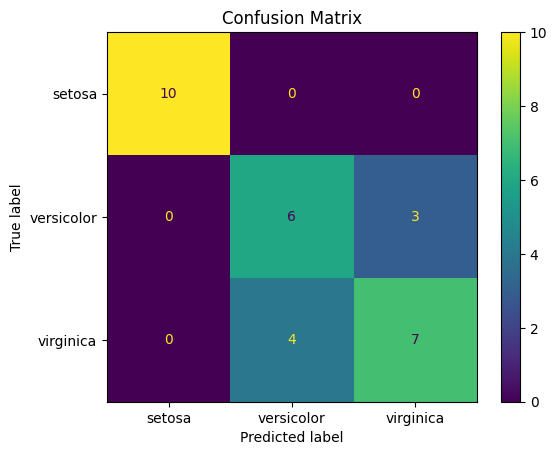

In [4]:
# predict & evaluate  

y_pred = knn.predict(X_test)

# Accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
ConfusionMatrixDisplay(cm, display_labels=iris.target_names).plot()
plt.title("Confusion Matrix")
plt.show()


In [5]:
#  experiment wisth different k values  

for k in range(1, 11):
    model = KNeighborsClassifier(n_neighbors=k)
    model.fit(X_train, y_train)
    acc = model.score(X_test, y_test)
    print(f"K={k}, Accuracy={acc:.2f}")


K=1, Accuracy=0.70
K=2, Accuracy=0.70
K=3, Accuracy=0.83
K=4, Accuracy=0.73
K=5, Accuracy=0.77
K=6, Accuracy=0.80
K=7, Accuracy=0.80
K=8, Accuracy=0.83
K=9, Accuracy=0.83
K=10, Accuracy=0.77


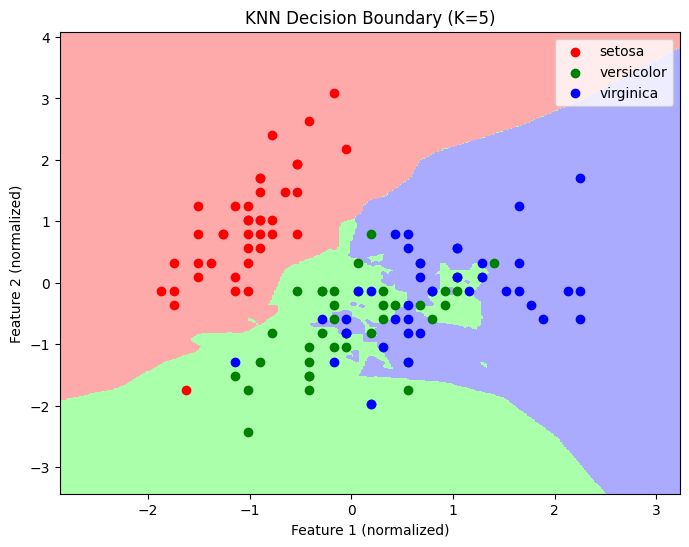

In [6]:
# visualize decision boundaries  

def plot_decision_boundary(X, y, model, title):
    h = .02
    cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA', '#AAAAFF'])
    cmap_bold = ['red', 'green', 'blue']

    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))

    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    plt.figure(figsize=(8, 6))
    plt.contourf(xx, yy, Z, cmap=cmap_light)
    for i, color in enumerate(cmap_bold):
        plt.scatter(X[y == i, 0], X[y == i, 1], c=color, label=iris.target_names[i])
    plt.legend()
    plt.title(title)
    plt.xlabel("Feature 1 (normalized)")
    plt.ylabel("Feature 2 (normalized)")
    plt.show()

# Plot for K=5
plot_decision_boundary(X_train, y_train, knn, "KNN Decision Boundary (K=5)")
